In [2]:
from nltk.corpus import wordnet as wn
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
import pandas as pd
import re
from nltk.corpus import sentiwordnet as swn
from nltk import word_tokenize
import matplotlib.pyplot as plt


In [2]:
# nltk.download('stopwords')

### Stealing preproc

In [9]:
# # df = pd.read_csv('./training.1600000.processed.noemoticon.csv')
# DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
# DATASET_ENCODING = "ISO-8859-1"
# TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# stop_words = stopwords.words("english")

# df = pd.read_csv('./training.1600000.processed.noemoticon.csv', encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

In [12]:
# https://www.kaggle.com/paoloripamonti/twitter-sentiment-analysis
# def preprocess(text, stem=False):
#     # Remove link,user and special characters
#     text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
#     tokens = []
#     for token in text.split():
#         if token not in stop_words:
#             if stem:
#                 tokens.append(stemmer.stem(token))
#             else:
#                 tokens.append(token)
#     return " ".join(tokens)

# # %%time
# df.text = df.text.apply(lambda x: preprocess(x))

In [3]:
# df.to_pickle('./cleaned_tweets.pickle')

df = pd.read_pickle('./cleaned_tweets.pickle')

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

'''Input: Tweet from df_test.
    Create new value in either positive or negative column
   Output: Create pandas column score/
   
   for each tweet in df_test
   get the polarity score
   if positive column = 1 else vice versa
'''

df_test = df.copy()[:10]



def row_polarity(tweet_row):
#     take in tweet return tweet, and polarity scores
    analyzer = SentimentIntensityAnalyzer()
    pols = analyzer.polarity_scores(tweet_row.text)
#     pol_df = pd.DataFrame({'tweet':tweet,
#                           'neutral': 0,
#                           'positive': 0,
#                           'negative': 0},dtype='object')  
    if pols['neu'] == 1.0:
        tweet_row['neutral'] = 1
    if pols['pos'] != 0.0 and pols['pos'] > pols['neg']:
        tweet_row['positive'] = 1
    else:
#         print('neg')
        tweet_row['negative'] = 1
    return tweet_row
    

        


In [8]:
# # takes many hours
# df = df.apply(row_polarity, axis=1)
# pd.to_pickle(df, './sentiment_tweets.pickle')

TypeError: to_pickle() missing 1 required positional argument: 'filepath_or_buffer'

In [57]:
df = pd.read_pickle('./sentiment_tweets.pickle')

In [58]:
df = df.fillna(0)
df = df.drop(columns=['flag', 'ids', 'target', 'user']); df.head()

,date,negative,neutral,positive,text
0,Mon Apr 06 22:19:45 PDT 2009,1.0,0.0,0.0,awww bummer shoulda got david carr third day
1,Mon Apr 06 22:19:49 PDT 2009,1.0,0.0,0.0,upset update facebook texting might cry result...
2,Mon Apr 06 22:19:53 PDT 2009,0.0,0.0,1.0,dived many times ball managed save 50 rest go ...
3,Mon Apr 06 22:19:57 PDT 2009,1.0,0.0,0.0,whole body feels itchy like fire
4,Mon Apr 06 22:19:57 PDT 2009,1.0,0.0,0.0,behaving mad see


In [59]:
# convert to date time, disregard the time element
# takes a bout 30min to run
df['date'] = pd.to_datetime(df['date']).dt.date

/home/franticoreo/.local/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


KeyboardInterrupt: 

In [29]:
# group by the date of tweets and sum - we only want to keep the moods scores and date
df_summed = df.groupby('date', as_index=False).sum()
# df_summed = df_summed.drop(columns=['target', 'ids'])

# df_summed.head()
df_summed

,date,negative,neutral,positive
0,2009-04-06,1701.0,868.0,1659.0
1,2009-04-07,8426.0,4551.0,8885.0
2,2009-04-17,1389.0,740.0,1695.0
3,2009-04-18,10321.0,5646.0,11433.0
4,2009-04-19,12972.0,7210.0,14497.0
5,2009-04-20,8735.0,4705.0,9725.0
6,2009-04-21,4086.0,2206.0,4501.0
7,2009-05-01,3632.0,1830.0,4084.0
8,2009-05-02,12971.0,6982.0,14463.0
9,2009-05-03,17023.0,9054.0,18310.0


In [30]:
# get total amount 
df_summed['total_score'] = df_summed.drop(columns=['date']).sum(axis=1).astype(int)
df_summed.head(5)

,date,negative,neutral,positive,total_score
0,2009-04-06,1701.0,868.0,1659.0,4228
1,2009-04-07,8426.0,4551.0,8885.0,21862
2,2009-04-17,1389.0,740.0,1695.0,3824
3,2009-04-18,10321.0,5646.0,11433.0,27400
4,2009-04-19,12972.0,7210.0,14497.0,34679


In [31]:
# compute row average for each mood against the total score for the day
def mood_avg(row):
    return row / df_summed['total_score'][row.name] * 100

df_avg = df_summed.drop(columns=['date']).apply(mood_avg, axis=1)

# remove total score as it is now meaningless

df = df_avg.drop(columns=['total_score'])

### Scaling 

In [33]:
from sklearn.preprocessing import StandardScaler

cols = ['positive', 'neutral', 'negative']

scaler = StandardScaler()

df_avg[cols] = scaler.fit_transform(df_avg[cols])

In [34]:
df = pd.concat([df_summed['date'],df_avg], axis=1)


In [37]:
df.date.min(), df.date.max() 

(datetime.date(2009, 4, 6), datetime.date(2009, 6, 25))

In [38]:
df

,date,negative,neutral,positive,total_score
0,2009-04-06,-0.057990,0.534566,0.001579,100.0
1,2009-04-07,-0.370057,1.036600,0.268420,100.0
2,2009-04-17,-0.779716,-1.525622,0.969153,100.0
3,2009-04-18,-0.531421,0.667510,0.474793,100.0
4,2009-04-19,-0.579793,0.990683,0.489462,100.0
5,2009-04-20,-0.524060,0.151691,0.523327,100.0
6,2009-04-21,-0.496340,0.376114,0.470357,100.0
7,2009-05-01,-0.461352,-1.842309,0.675661,100.0
8,2009-05-02,-0.527547,0.110188,0.531434,100.0
9,2009-05-03,-0.405223,0.303889,0.384356,100.0


In [39]:
# df.to_pickle('./tweets_scaled_avg.pickle')

### Load processed DF 

In [40]:
df = pd.read_pickle('./tweets_scaled_avg.pickle')

### Dow Jones Data  

In [41]:
def average_directional_movement_index(df, n, n_ADX):
    """Calculate the Average Directional Movement Index for given data.
    
    :param df: pandas.DataFrame
    :param n: 
    :param n_ADX: 
    :return: pandas.DataFrame
    """
    i = 0
    UpI = []
    DoI = []
    while i + 1 <= df.index[-1]:
        UpMove = df.loc[i + 1, 'High'] - df.loc[i, 'High']
        DoMove = df.loc[i, 'Low'] - df.loc[i + 1, 'Low']
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    i = 0
    TR_l = [0]
    while i < df.index[-1]:
        TR = max(df.loc[i + 1, 'High'], df.loc[i, 'Close']) - min(df.loc[i + 1, 'Low'], df.loc[i, 'Close'])
        TR_l.append(TR)
        i = i + 1
    TR_s = pd.Series(TR_l)
    ATR = pd.Series(TR_s.ewm(span=n, min_periods=n).mean())
    UpI = pd.Series(UpI)
    DoI = pd.Series(DoI)
    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean() / ATR)
    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean() / ATR)
    ADX = pd.Series((abs(PosDI - NegDI) / (PosDI + NegDI)).ewm(span=n_ADX, min_periods=n_ADX).mean(),
                    name='ADX_' + str(n) + '_' + str(n_ADX))
    df = df.join(ADX)
    return df


In [ ]:
dji_raw = pd.read_csv('./^DJI.csv'); dji_raw.head()

In [ ]:
def change_adx(dji_df, n, n_adx):
    dji = average_directional_movement_index(dji_df, n,n_adx)
    num_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', f'ADX_{n}_{n_adx}']
    dji[num_cols] = scaler.fit_transform(dji[num_cols])

    return dji[['Date', f'ADX_{n}_{n_adx}']]
    

In [44]:
dji = change_adx(dji_raw, 4, 4)

In [ ]:
import matplotlib

plt.figure(figsize=(14,8))
# plt.plot(df['date'], df['positive'], label='Positive')
# plt.plot(df['date'], df['neutral'], label='Neutral')
# plt.plot(df['date'], df['negative'], label='Negative')
plt.plot(dji['Date'], dji['ADX_4_4'], label='DJI')
plt.legend();

In [45]:
dji.columns

Index(['Date', 'ADX_4_4'], dtype='object')

In [46]:
dji['Date'] = pd.to_datetime(dji['Date'])

In [47]:
dji.Date.min(), dji.Date.max() 

(Timestamp('2009-04-06 00:00:00'), Timestamp('2009-06-24 00:00:00'))

In [48]:
dji.Date.min(), dji.Date.max() 

(Timestamp('2009-04-06 00:00:00'), Timestamp('2009-06-24 00:00:00'))

In [49]:
df.date.min(), df.date.max() 

(datetime.date(2009, 4, 6), datetime.date(2009, 6, 25))

In [67]:
import matplotlib

plt.figure(figsize=(14,8))
plt.plot(df['date'], df['positive'], label='Positive')
plt.plot(df['date'], df['neutral'], label='Neutral')
plt.plot(df['date'], df['negative'], label='Negative')
plt.plot(dji['Date'], dji['ADX_4_4'], label='DJI')
plt.legend();

/home/franticoreo/.local/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/home/franticoreo/.local/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/home/franticoreo/.local/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/home/franticoreo/.local/lib/python3.7/s

ValueError: view limit minimum -38718.1 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

## What If I don't Average over day and just scale? 

In [ ]:
df_summed = df_summed.drop(columns=['total_score'])

In [64]:
# df_summed[]
df_summed[cols] = scaler.fit_transform(df_summed[cols])

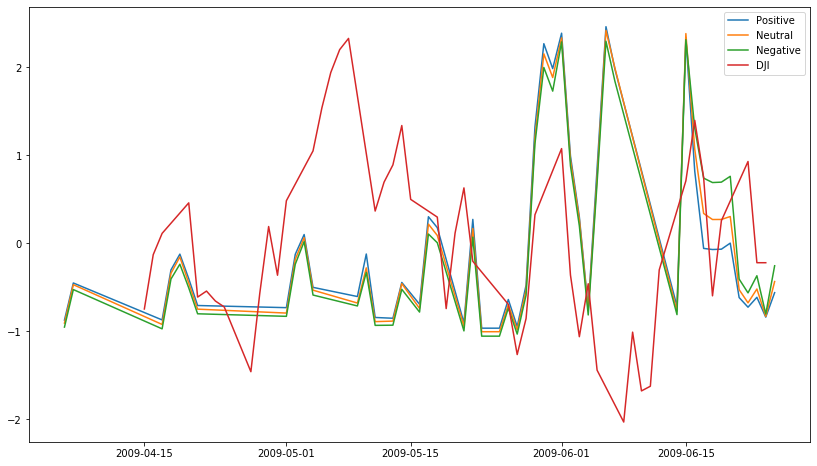

In [66]:
plt.figure(figsize=(14,8))
plt.plot(df_summed['date'], df_summed['positive'], label='Positive')
plt.plot(df_summed['date'], df_summed['neutral'], label='Neutral')
plt.plot(df_summed['date'], df_summed['negative'], label='Negative')
plt.plot(dji['Date'], dji['ADX_4_4'], label='DJI')
plt.legend();